In [32]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [77]:
product=pd.read_csv("sgemm_product.csv")
product.shape

(241600, 18)

In [78]:
product_1=product
product_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [79]:
product_1['Average']=product_1[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)#axis is 1 as it is taking y as reference and is taking out average with respect to it.
print(product)

        MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  \
0        16   16   16      8      8      8      8    2    1    1     0     0   
1        16   16   16      8      8      8      8    2    1    1     0     0   
2        16   16   16      8      8      8      8    2    1    1     0     0   
3        16   16   16      8      8      8      8    2    1    1     0     0   
4        16   16   16      8      8      8      8    2    1    1     0     1   
...     ...  ...  ...    ...    ...    ...    ...  ...  ...  ...   ...   ...   
241595  128  128   32     32     32     32     32    8    4    4     1     0   
241596  128  128   32     32     32     32     32    8    4    4     1     1   
241597  128  128   32     32     32     32     32    8    4    4     1     1   
241598  128  128   32     32     32     32     32    8    4    4     1     1   
241599  128  128   32     32     32     32     32    8    4    4     1     1   

        SA  SB  Run1 (ms)  Run2 (ms)  R

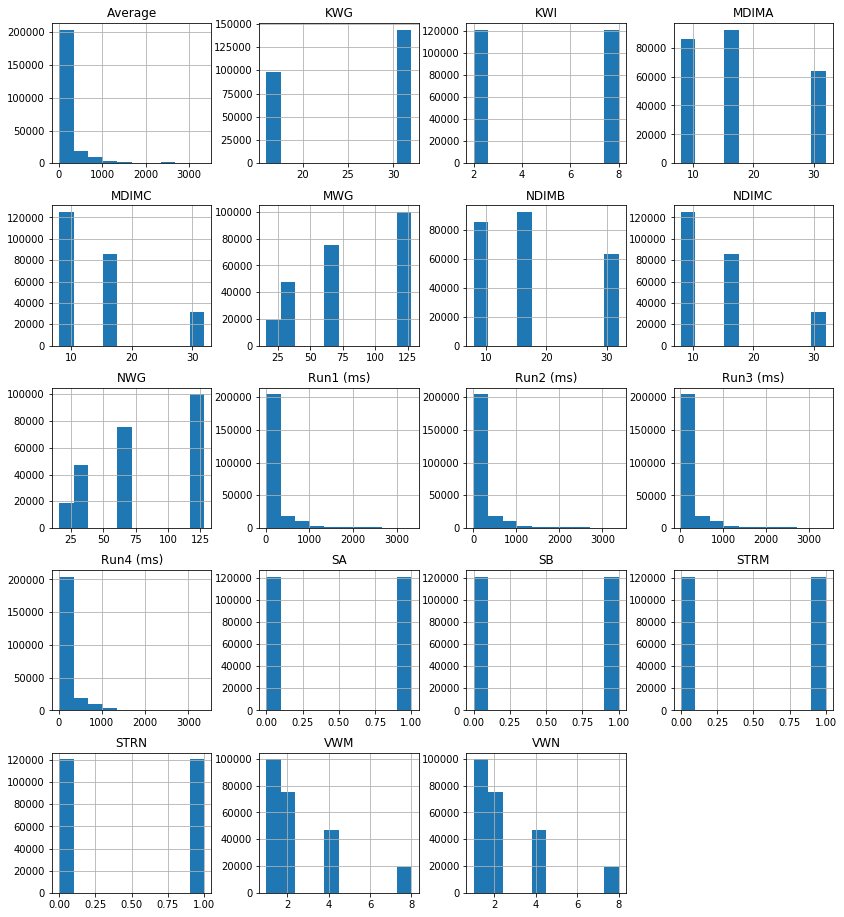

In [80]:
product_1.hist(figsize=[14,16]);

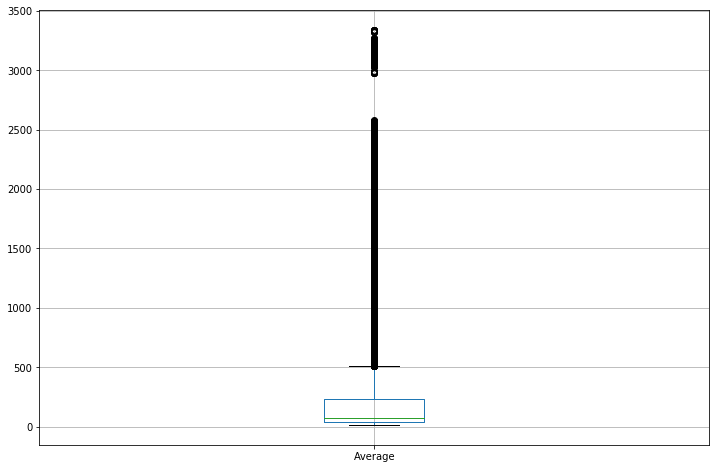

In [81]:
#boxplot application
plt.figure(figsize=(12,8))
boxplot = product_1.boxplot(['Average'])

In [82]:
#remove as per input std outlier
product_1_OUTLIER = product_1.drop(product_1[(product_1.Average>2500)|(product_1.Average<0)].index)
product_1_OUTLIER.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241089 entries, 0 to 241599
Data columns (total 19 columns):
MWG          241089 non-null int64
NWG          241089 non-null int64
KWG          241089 non-null int64
MDIMC        241089 non-null int64
NDIMC        241089 non-null int64
MDIMA        241089 non-null int64
NDIMB        241089 non-null int64
KWI          241089 non-null int64
VWM          241089 non-null int64
VWN          241089 non-null int64
STRM         241089 non-null int64
STRN         241089 non-null int64
SA           241089 non-null int64
SB           241089 non-null int64
Run1 (ms)    241089 non-null float64
Run2 (ms)    241089 non-null float64
Run3 (ms)    241089 non-null float64
Run4 (ms)    241089 non-null float64
Average      241089 non-null float64
dtypes: float64(5), int64(14)
memory usage: 36.8 MB


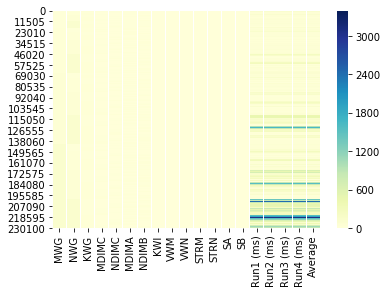

In [83]:
import seaborn as sb
heatmap=sb.heatmap(product_1,cmap="YlGnBu")
plt.show()

In [84]:
product_1=product_1.drop(["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1)


In [85]:
product_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
MWG        241600 non-null int64
NWG        241600 non-null int64
KWG        241600 non-null int64
MDIMC      241600 non-null int64
NDIMC      241600 non-null int64
MDIMA      241600 non-null int64
NDIMB      241600 non-null int64
KWI        241600 non-null int64
VWM        241600 non-null int64
VWN        241600 non-null int64
STRM       241600 non-null int64
STRN       241600 non-null int64
SA         241600 non-null int64
SB         241600 non-null int64
Average    241600 non-null float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


In [86]:
product_1['log_Average']=np.log(product_1.Average)

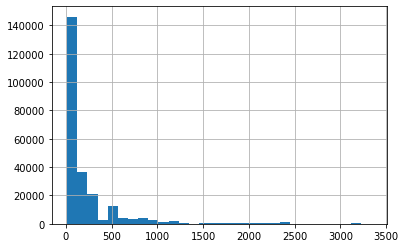

In [87]:
prod = ["Average","log_Average"]
prod=product_1['Average']
prod.hist(bins = 30);

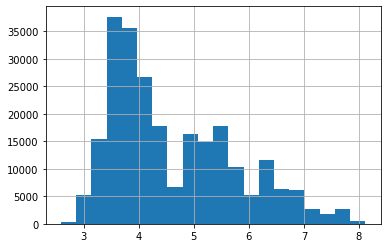

In [88]:
prd1=product_1['log_Average']
prd1.hist(bins = 20);

In [89]:
#finding correlation matrix of all the attributes
product_1.corr()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Average,log_Average
MWG,1.000000e+00,5.999256e-04,9.295914e-03,1.057905e-01,-8.590185e-03,1.587719e-01,1.489790e-02,1.477334e-19,3.537634e-01,-8.409828e-04,6.925002e-21,1.385000e-21,0.000000,0.000000,0.351810,0.459029
NWG,5.999256e-04,1.000000e+00,9.295914e-03,-8.590185e-03,1.057905e-01,1.489790e-02,1.587719e-01,8.568535e-19,-8.409828e-04,3.537634e-01,6.925002e-21,1.385000e-21,0.000000,0.000000,0.320460,0.346429
KWG,9.295914e-03,9.295914e-03,1.000000e+00,1.483483e-01,1.483483e-01,-3.456333e-02,-3.456333e-02,-1.809508e-19,-1.198611e-02,-1.198611e-02,1.871905e-21,0.000000e+00,0.000000,0.000000,0.011230,-0.020358
MDIMC,1.057905e-01,-8.590185e-03,1.483483e-01,1.000000e+00,-2.095622e-01,1.974329e-01,8.460552e-02,-3.179926e-18,-1.339114e-01,1.053121e-02,-1.120569e-20,-3.735230e-21,0.000000,0.000000,-0.221097,-0.252085
NDIMC,-8.590185e-03,1.057905e-01,1.483483e-01,-2.095622e-01,1.000000e+00,8.460552e-02,1.974329e-01,-5.251734e-18,1.053121e-02,-1.339114e-01,-1.120569e-20,-3.735230e-21,0.000000,0.000000,-0.214595,-0.243448
MDIMA,1.587719e-01,1.489790e-02,-3.456333e-02,1.974329e-01,8.460552e-02,1.000000e+00,8.809625e-02,-4.552194e-18,-2.027124e-01,-1.903229e-02,1.566122e-21,1.566122e-21,0.000000,0.000000,-0.007035,-0.023076
NDIMB,1.489790e-02,1.587719e-01,-3.456333e-02,8.460552e-02,1.974329e-01,8.809625e-02,1.000000e+00,-1.083339e-17,-1.903229e-02,-2.027124e-01,1.566122e-21,1.566122e-21,0.000000,0.000000,-0.008707,-0.033688
KWI,1.477334e-19,8.568535e-19,-1.809508e-19,-3.179926e-18,-5.251734e-18,-4.552194e-18,-1.083339e-17,1.000000e+00,-3.613975e-16,-4.814803e-16,0.000000e+00,0.000000e+00,0.000000,0.000000,0.032571,-0.011200
VWM,3.537634e-01,-8.409828e-04,-1.198611e-02,-1.339114e-01,1.053121e-02,-2.027124e-01,-1.903229e-02,-3.613975e-16,1.000000e+00,1.164501e-03,-1.411219e-20,9.408125e-22,0.000000,0.000000,0.164273,0.209574
VWN,-8.409828e-04,3.537634e-01,-1.198611e-02,1.053121e-02,-1.339114e-01,-1.903229e-02,-2.027124e-01,-4.814803e-16,1.164501e-03,1.000000e+00,-1.411219e-20,9.408125e-22,0.000000,0.000000,0.144745,0.145031


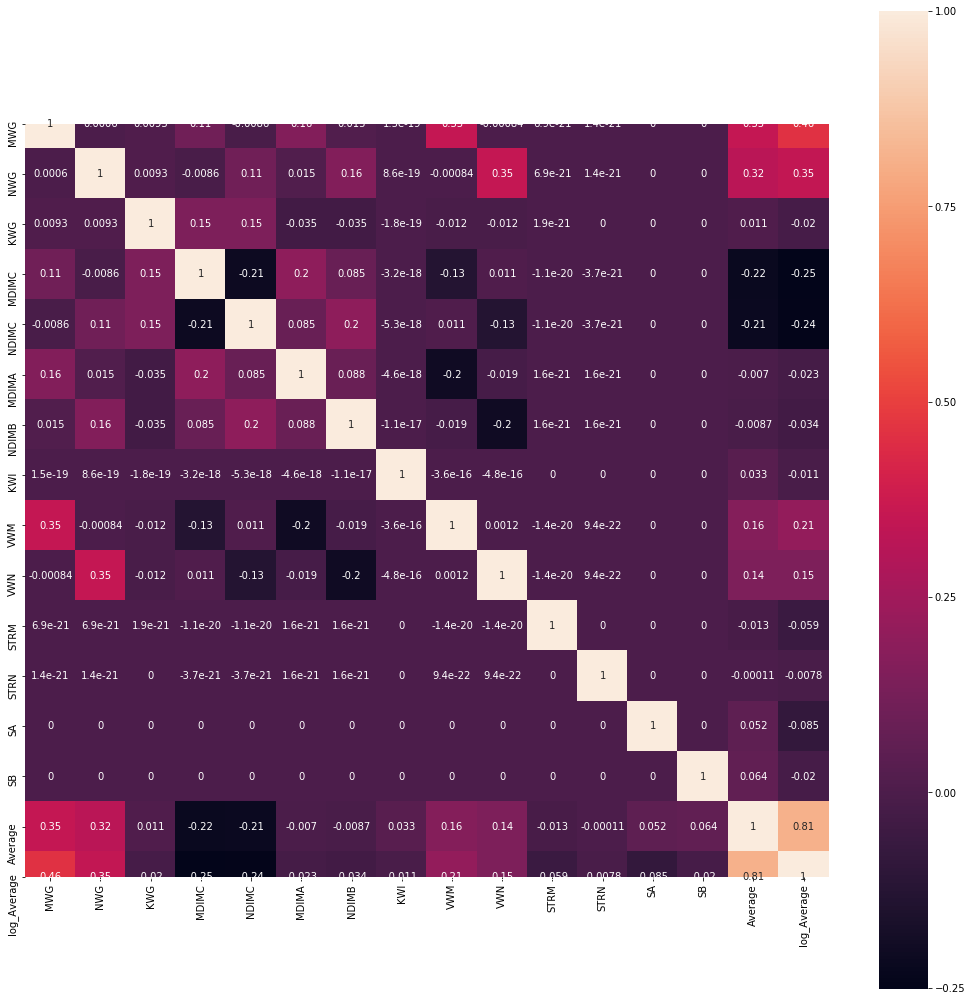

In [90]:
#plotting correlation matrix
import seaborn as sns
corr=product_1.corr()
plt.figure(figsize = (18,18))
sns.heatmap(corr,cbar= True, annot=True, square = True)
plt.show()

In [47]:
#column management

In [91]:
parameters =["MWG","NWG","KWG","MDIMC","NDIMC","MDIMA","NDIMB","KWI","VWM","VWN","STRM","STRN","SA","SB"]
target=["Average"]
x_parameter=product_1[parameters]
y_parameter=product_1[target]
#x_parameter.insert(0,'Intercept',1)
x_parameter.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0


In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
x_parameter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 14 columns):
MWG      241600 non-null int64
NWG      241600 non-null int64
KWG      241600 non-null int64
MDIMC    241600 non-null int64
NDIMC    241600 non-null int64
MDIMA    241600 non-null int64
NDIMB    241600 non-null int64
KWI      241600 non-null int64
VWM      241600 non-null int64
VWN      241600 non-null int64
STRM     241600 non-null int64
STRN     241600 non-null int64
SA       241600 non-null int64
SB       241600 non-null int64
dtypes: int64(14)
memory usage: 25.8 MB


In [95]:
x_scaled = scaler.fit_transform(x_parameter)

In [96]:
x_parameter = pd.DataFrame(x_scaled,columns=parameters)

In [97]:
x_parameter.insert(0,'Intercept',1)

In [98]:
y_parameter

,Average
0,116.3700
1,78.7050
2,80.5650
3,86.6375
4,118.6625
...,...
241595,17.8175
241596,36.0350
241597,35.1600
241598,28.4525


### Part1 

In [99]:

#Splitting the data randomly into test and train data set
x1_train, x1_test, y1_train, y1_test = train_test_split(x_parameter, y_parameter, test_size=0.2, random_state = 0)

In [100]:
x1_train = x1_train.as_matrix()
x1_test = x1_test.as_matrix()
y1_train = y1_train.as_matrix()
y1_test = y1_test.as_matrix()

### Linear Regression

In [101]:
def costFunction(Datax, Datay, coeffMatrix):
    dataLength = len(Datax);
    costValue = np.sum(((Datax.dot(coeffMatrix.T)) - Datay) ** 2) / (2 * dataLength);
    return costValue;

In [102]:
def lin_gradient(datax, datay, alpha, iterations):
    coeffMatrix = np.zeros((1, len(datax[0])));
    length = len(datay);
    hist_cost = [0] * iterations;
    for i in range(iterations):
        costValue = costFunction(datax, datay, coeffMatrix);
        hist_cost[i] = costValue; 
        difference = datax.dot(coeffMatrix.T) - datay;
        gradient_descent = datax.T.dot(difference) / length;
        coeffMatrix = coeffMatrix - (alpha * gradient_descent.T);    
#threshold = 0.0000001
        if (abs(hist_cost[i]- hist_cost[i-1])) <=0.0000001:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', hist_cost[0])
                print('Cost at convergance: ', hist_cost[i-1])
                break
    hist_cost = np.trim_zeros(hist_cost)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(hist_cost) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix
        

In [103]:

def predict_lin(x1_test, coeffMatrix):
    pred_target = x1_test.dot(coeffMatrix.T);
    return pred_target;

In [104]:
def lin_rmse(y1_test, pred_target):
    m_rmse = (sum((y1_test - pred_target) ** 2) / len(y1_test))
    m_rmse = ((m_rmse)**(1/2))
    return m_rmse;

Convergence threshold level reached
Iterations needed to converge:  18
Initial cost:  91914.740355237
Cost at convergance:  40292.01437493188
Model Coefficients:  [[ 218.0101524   141.65663365  130.84714614   41.16108738 -131.56270648
  -128.83843492   10.12430996    9.50364822   12.39775428   -2.77963638
    -6.34159522   -4.59608684    0.27944144   19.46804336   23.84465521]]


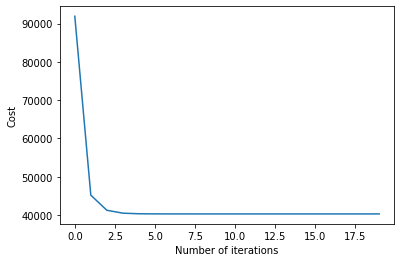

predicted dataset [[ 469.4489144 ]
 [ 105.8420927 ]
 [ 152.44538143]
 ...
 [  62.69964705]
 [ 444.02946992]
 [-119.40454149]]
RMSE for alpha= 1   is:  [283.75960895]


Convergence threshold level reached
Iterations needed to converge:  24
Initial cost:  91914.740355237
Cost at convergance:  40292.014374960985
Model Coefficients:  [[ 218.0101525   141.6565995   130.84711401   41.16106933 -131.56267379
  -128.83840281   10.12431447    9.50365155   12.39775437   -2.77959938
    -6.34156052   -4.59608693    0.27944157   19.46804351   23.84465519]]


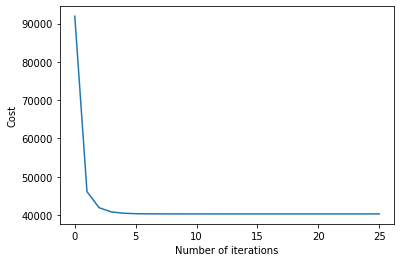

predicted dataset [[ 469.44882423]
 [ 105.84218027]
 [ 152.4453584 ]
 ...
 [  62.69965571]
 [ 444.02942127]
 [-119.40448712]]
RMSE for alpha= 0.8   is:  [283.75960866]


Convergence threshold level reached
Iterations needed to converge:  34
Initial cost:  91914.740355237
Cost at convergance:  40292.01437499217
Model Coefficients:  [[ 218.01015263  141.65655358  130.84707083   41.16104311 -131.56262494
  -128.83835475   10.12432025    9.50365584   12.39775449   -2.77955178
    -6.34151557   -4.59608703    0.27944176   19.46804372   23.84465521]]


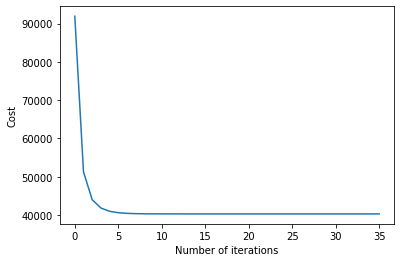

predicted dataset [[ 469.44870022]
 [ 105.84229505]
 [ 152.44532942]
 ...
 [  62.69966971]
 [ 444.02935032]
 [-119.40440645]]
RMSE for alpha= 0.6   is:  [283.75960827]


Convergence threshold level reached
Iterations needed to converge:  53
Initial cost:  91914.740355237
Cost at convergance:  40292.01437509336
Model Coefficients:  [[ 218.01015292  141.65645348  130.84697662   41.1609838  -131.5625154
  -128.83824691   10.12433115    9.50366359   12.39775473   -2.77944802
    -6.3414175    -4.59608723    0.27944218   19.46804421   23.84465525]]


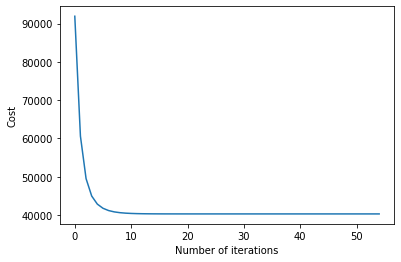

predicted dataset [[ 469.44842971]
 [ 105.84254843]
 [ 152.44526936]
 ...
 [  62.69969902]
 [ 444.02919278]
 [-119.40422861]]
RMSE for alpha= 0.4   is:  [283.75960741]


Convergence threshold level reached
Iterations needed to converge:  109
Initial cost:  91914.740355237
Cost at convergance:  40292.014375330684
Model Coefficients:  [[ 218.01015345  141.6562667   130.84680049   41.16086673 -131.56230199
  -128.83803661   10.12434657    9.50367337   12.3977552    -2.77925443
    -6.3412342    -4.59608757    0.27944299   19.46804517   23.84465534]]


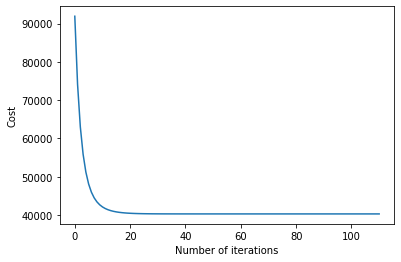

predicted dataset [[ 469.44792412]
 [ 105.84303077]
 [ 152.44516649]
 ...
 [  62.69975014]
 [ 444.02889038]
 [-119.40389087]]
RMSE for alpha= 0.2   is:  [283.75960579]


Convergence threshold level reached
Iterations needed to converge:  217
Initial cost:  91914.740355237
Cost at convergance:  40292.0143758362
Model Coefficients:  [[ 218.01015417  141.65601377  130.84656185   41.1607047  -131.56200811
  -128.83774691   10.12436476    9.50368403   12.39775582   -2.7789923
    -6.34098585   -4.59608801    0.27944411   19.4680465    23.84465547]]


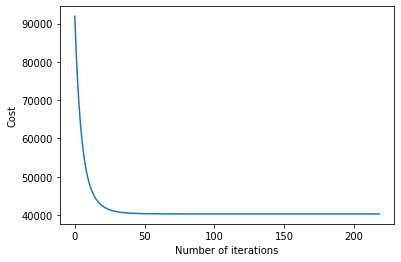

predicted dataset [[ 469.4472391 ]
 [ 105.84368905]
 [ 152.44503218]
 ...
 [  62.69981741]
 [ 444.02847627]
 [-119.40343035]]
RMSE for alpha= 0.1   is:  [283.75960356]


Convergence threshold level reached
Iterations needed to converge:  427
Initial cost:  91914.740355237
Cost at convergance:  40292.01437675948
Model Coefficients:  [[ 218.01015503  141.65570257  130.84626807   41.16050206 -131.56164187
  -128.8373858    10.12438458    9.50369473   12.39775659   -2.77866977
    -6.34068013   -4.59608853    0.2794455    19.46804816   23.84465563]]


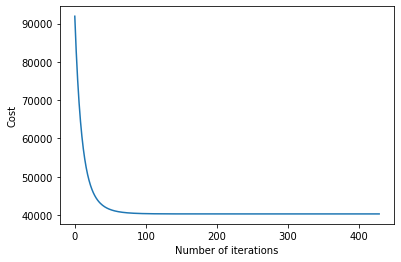

predicted dataset [[ 469.44639586]
 [ 105.84450386]
 [ 152.44487165]
 ...
 [  62.69989833]
 [ 444.0279624 ]
 [-119.40286072]]
RMSE for alpha= 0.05   is:  [283.75960082]




KeyboardInterrupt: 

In [105]:

# linear regression function for Different Learning ratee
learning_rate = [1,0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
coef_hist_lin = [0] * len(learning_rate)
pred_y_lin = [0] * len(learning_rate)
rmse_lin = [0] * len(learning_rate)
for i, lr in enumerate(learning_rate, start=0):
    coef_hist_lin[i] = lin_gradient(x1_train, y1_train, lr, 10000)
    pred_y_lin[i] = predict_lin(x1_test, coef_hist_lin[i])
    print("predicted dataset", pred_y_lin[i])
    rmse_lin[i] = lin_rmse(y1_test, pred_y_lin[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin[i])
    print ('\n')

### Experiment 1 for different learning rate for linear

In [106]:
#Experiment 1
# linear regression function for Different Learning ratee
learning_rate = [0.00098,0.00096,0.00094,0.00093,0.00092,0.00091,0.00090,0.00089,0.00088,0.00087]
coef_hist_lin = [0] * len(learning_rate)
pred_y_lin = [0] * len(learning_rate)
rmse_lin = [0] * len(learning_rate)
for i, lr in enumerate(learning_rate, start=0):
    coef_hist_lin[i] = lin_gradient(x1_train, y1_train, lr, 10000)
    pred_y_lin[i] = predict_lin(x1_test, coef_hist_lin[i])
    print("predicted dataset", pred_y_lin[i])
    rmse_lin[i] = lin_rmse(y1_test, pred_y_lin[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin[i])
    print ('\n')

KeyboardInterrupt: 

In [64]:
alpha = [0.00098,0.00096,0.00094,0.00093,0.00092,0.00091,0.00090,0.00089,0.00088,0.00087]
rmse = [283.7654844,283.7654843,283.7654842,283.7654841,283.7654840,283.7654839,283.7654835,283.7654836,283.7654838,283.7654839]

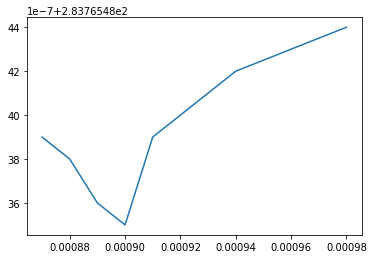

In [65]:
#plot for experiment1
plt.plot(alpha, rmse)


### Experiment 2 for different threshold for linear Regression



In [109]:
#Trying for different threshold , 0.00001
def lin_gradientT1(datax, datay, alpha, iterations):
    coeffMatrix = np.zeros((1, len(datax[0])));
    length = len(datay);
    hist_cost = [0] * iterations;
    for i in range(iterations):
        costValue = costFunction(datax, datay, coeffMatrix);
        hist_cost[i] = costValue; 
        difference = datax.dot(coeffMatrix.T) - datay;
        gradient_descent = datax.T.dot(difference) / length;
        coeffMatrix = coeffMatrix - (alpha * gradient_descent.T);    
        if (abs(hist_cost[i]- hist_cost[i-1])) <=0.00001:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', hist_cost[0])
                print('Cost at convergance: ', hist_cost[i-1])
                break
    hist_cost = np.trim_zeros(hist_cost)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(hist_cost) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix

In [110]:
# linear regression function for the best alpha value for the above threshold
learning_rate = [0.0009]
coef_hist_lin = [0] * len(learning_rate)
pred_y_lin = [0] * len(learning_rate)
rmse_lin = [0] * len(learning_rate)
for i, lr in enumerate(learning_rate, start=0):
    coef_hist_lin[i] = lin_gradientT1(x1_train, y1_train, lr, 10000)
    pred_y_lin[i] = predict_lin(x1_test, coef_hist_lin[i])
    print("predicted dataset", pred_y_lin[i])
    rmse_lin[i] = lin_rmse(y1_test, pred_y_lin[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin[i])
    print ('\n')

KeyboardInterrupt: 

In [ ]:
#Trying for different threshold, 0.01
def lin_gradientT2(datax, datay, alpha, iterations):
    coeffMatrix = np.zeros((1, len(datax[0])));
    length = len(datay);
    hist_cost = [0] * iterations;
    for i in range(iterations):
        costValue = costFunction(datax, datay, coeffMatrix);
        hist_cost[i] = costValue; 
        difference = datax.dot(coeffMatrix.T) - datay;
        gradient_descent = datax.T.dot(difference) / length;
        coeffMatrix = coeffMatrix - (alpha * gradient_descent.T);    
        if (abs(hist_cost[i]- hist_cost[i-1])) <=0.01:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', hist_cost[0])
                print('Cost at convergance: ', hist_cost[i-1])
                break
    hist_cost = np.trim_zeros(hist_cost)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(hist_cost) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix

In [ ]:
# linear regression function for different threshold for the best aplha value
learning_rate = [0.0009]
coef_hist_lin = [0] * len(learning_rate)
pred_y_lin = [0] * len(learning_rate)
rmse_lin = [0] * len(learning_rate)
for i, lr in enumerate(learning_rate, start=0):
    coef_hist_lin[i] = lin_gradientT2(x1_train, y1_train, lr, 10000)
    pred_y_lin[i] = predict_lin(x1_test, coef_hist_lin[i])
    print("predicted dataset", pred_y_lin[i])
    rmse_lin[i] = lin_rmse(y1_test, pred_y_lin[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin[i])
    print ('\n')

In [ ]:
#Trying for different threshold, 0.1
def lin_gradientT3(datax, datay, alpha, iterations):
    coeffMatrix = np.zeros((1, len(datax[0])));
    length = len(datay);
    hist_cost = [0] * iterations;
    for i in range(iterations):
        costValue = costFunction(datax, datay, coeffMatrix);
        hist_cost[i] = costValue; 
        difference = datax.dot(coeffMatrix.T) - datay;
        gradient_descent = datax.T.dot(difference) / length;
        coeffMatrix = coeffMatrix - (alpha * gradient_descent.T);    
        if (abs(hist_cost[i]- hist_cost[i-1])) <=0.1:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', hist_cost[0])
                print('Cost at convergance: ', hist_cost[i-1])
                break
    hist_cost = np.trim_zeros(hist_cost)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(hist_cost) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix

In [ ]:
# linear regression function for the above thershold for the best alpha value.
learning_rate = [0.0009]
coef_hist_lin = [0] * len(learning_rate)
pred_y_lin = [0] * len(learning_rate)
rmse_lin = [0] * len(learning_rate)
for i, lr in enumerate(learning_rate, start=0):
    coef_hist_lin[i] = lin_gradientT3(x1_train, y1_train, lr, 10000)
    pred_y_lin[i] = predict_lin(x1_test, coef_hist_lin[i])
    print("predicted dataset", pred_y_lin[i])
    rmse_lin[i] = lin_rmse(y1_test, pred_y_lin[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin[i])
    print ('\n')

In [ ]:
#Note down accuracy for threshold:
threshold_linear = [0.00001,0.01,0.1] 
rmse_linear =[283.75648345,283.77357268,284.03815423]

In [ ]:
plt.plot(threshold_linear,rmse_linear)
plt.xlabel('Threshold value')
plt.ylabel('RMSE (error)')
plt.title('RMSE Vs Threshold')

### Logistic Regression

In [ ]:
#Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

In [ ]:
X2 = product[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM','VWN', 'STRM', 'STRN', 'SA', 'SB']]

In [ ]:
y2 = product[['Average']]

In [ ]:
X2 = scaler.fit_transform(X2)

In [ ]:
X2 = pd.DataFrame(X2,columns=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM','VWN', 'STRM', 'STRN', 'SA', 'SB'])

In [ ]:
X2.insert(0,'Intercept',1)

In [ ]:
y2.loc[product_1['log_Average'] >= 4.62,'Average'] = 1
y2.loc[product_1['log_Average'] < 4.62,'Average'] = 0


In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [ ]:
X2_train = X2_train.as_matrix()
y2_train = y2_train.as_matrix()
X2_test = X2_test.as_matrix()
y2_test = y2_test.as_matrix()

In [ ]:
def sigmoid(Datax,coeffmatrix):
    z=np.dot(Datax,coeffmatrix.T)
    z=1/(1+np.exp(-z))
    return z  

In [ ]:
#define logistic cost function
def logisticcostvalue(sigmoid_df_y,Datay,datalength):
    datalength = len(Datay)
    total_cost = -(np.sum((Datay.T).dot(np.log(sigmoid_df_y))) + np.sum((1-Datay.T).dot(np.log(1-sigmoid_df_y))))/datalength
    return total_cost

In [ ]:
#define gradient function
def logistic_gradientDescent(Datax, Datay, alpha, iterations):
    
    print("learning rate: ", alpha)
    print("Iteration limit: ", iterations)
    coeffMatrix = np.zeros((1, len(Datax[0])));
    costHistory = [0] * iterations
    dataLength = len(Datax)
    

    for i in range(iterations):
        sigmoid_y = sigmoid(Datax,coeffMatrix)
        loss =  sigmoid_y - Datay
        gradient = Datax.T.dot(loss) / dataLength
        coeffMatrix = coeffMatrix - (alpha * gradient.T)
        costValue = logisticcostvalue(sigmoid_y, Datay, dataLength)
        costHistory[i] = costValue 
        if (abs(costHistory[i]- costHistory[i-1])) <=0.0000001:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', costHistory[0])
                print('Cost at convergance: ', costHistory[i-1])
                break
        if i == (iterations-1):
            print("Iteration limit reached ",iterations)
            print('Initial cost: ', costHistory[0])
            print('Cost at convergance: ', costHistory[i-1])
    
    costHistory = np.trim_zeros(costHistory)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix
    

In [ ]:
def logistic_predict(x2_test, coeffMatrix):
    predictedTarget = x2_test.dot(coeffMatrix.T);
    predictedTarget= np.where(predictedTarget >= 0.5 , 1, 0)
    return predictedTarget

In [ ]:
#how to print accuracy
def logistic_accuracy(ypredict,ytest):
  df = pd.DataFrame({'actual': ytest.flatten(), 'predicted': ypredict.flatten()})
  correct= df.loc[df['actual'] == df['predicted']]
  rate=len(correct)/len(ytest)   
  return rate

In [ ]:
alpha = [0.0001,0.001,0.005,0.01,0.05,0.075,0.1,0.25,0.5,0.75,1]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradientDescent(X2_train, y2_train, a, n_iters)
    ypred_ls[i] = logistic_predict(X2_test,beta_ls[i])
    accuracy_ls[i] = logistic_accuracy(y2_test,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'Accuracy:',accuracy_ls[i])
    print('\n')
   

### Experiment 1 for logistic

In [ ]:
#trying for different alpha values for logistic
alpha = [7.99]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradientDescent(X2_train, y2_train, a, n_iters)
    ypred_ls[i] = logistic_predict(X2_test,beta_ls[i])
    accuracy_ls[i] = logistic_accuracy(y2_test,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'Accuracy:',accuracy_ls[i])
    print('\n')

In [ ]:
#plot for accuracy and learning rate
alpha_logistic = [7.9,7.91,7.92,7.93,7.95,7.96,7.98,7.99]
accuracy_logistic = [0.899154,0.899149,0.899157,0.899182,0.899192,0.89917,0.899159,0.899147]


In [ ]:
plt.plot(alpha_logistic,accuracy_logistic)
plt.xlabel('Alpha Value')
plt.ylabel('Accuracy')

### Experiment 2 for logistic

In [ ]:
#trying for different threshold, 0.0000001
def logistic_gradientDescent(Datax, Datay, alpha, iterations):
    
    print("learning rate: ", alpha)
    print("Iteration limit: ", iterations)
    coeffMatrix = np.zeros((1, len(Datax[0])));
    #list for saving the cost from each iterations
    costHistory = [0] * iterations
    dataLength = len(Datax)
    
    #gradient descent
    for i in range(iterations):
        sigmoid_y = sigmoid(Datax,coeffMatrix)
        loss =  sigmoid_y - Datay
        gradient = Datax.T.dot(loss) / dataLength
        coeffMatrix = coeffMatrix - (alpha * gradient.T)
        costValue = logisticcostvalue(sigmoid_y, Datay, dataLength)
        costHistory[i] = costValue 
        if (abs(costHistory[i]- costHistory[i-1])) <=0.0000001:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', costHistory[0])
                print('Cost at convergance: ', costHistory[i-1])
                break
        if i == (iterations-1):
            print("Iteration limit reached ",iterations)
            print('Initial cost: ', costHistory[0])
            print('Cost at convergance: ', costHistory[i-1])
    
    costHistory = np.trim_zeros(costHistory)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix

In [ ]:
#trying for different threshold for different alpha
alpha = [7.95]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradientDescent(X2_train, y2_train, a, n_iters)
    ypred_ls[i] = logistic_predict(X2_test,beta_ls[i])
    accuracy_ls[i] = logistic_accuracy(y2_test,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'Accuracy:',accuracy_ls[i])
    print('\n')

In [ ]:
#trying for different threshold 0.001
def logistic_gradientDescent(Datax, Datay, alpha, iterations):
    
    print("learning rate: ", alpha)
    print("Iteration limit: ", iterations)
    coeffMatrix = np.zeros((1, len(Datax[0])));
    #list for saving the cost from each iterations
    costHistory = [0] * iterations
    dataLength = len(Datax)
    
    #gradient descent
    for i in range(iterations):
        sigmoid_y = sigmoid(Datax,coeffMatrix)
        loss =  sigmoid_y - Datay
        gradient = Datax.T.dot(loss) / dataLength
        coeffMatrix = coeffMatrix - (alpha * gradient.T)
        costValue = logisticcostvalue(sigmoid_y, Datay, dataLength)
        costHistory[i] = costValue 
        if (abs(costHistory[i]- costHistory[i-1])) <=0.001:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', costHistory[0])
                print('Cost at convergance: ', costHistory[i-1])
                break
        if i == (iterations-1):
            print("Iteration limit reached ",iterations)
            print('Initial cost: ', costHistory[0])
            print('Cost at convergance: ', costHistory[i-1])
    
    costHistory = np.trim_zeros(costHistory)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix

In [ ]:
#trying for different threshold for alpha
alpha = [7.95]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradientDescent(X2_train, y2_train, a, n_iters)
    ypred_ls[i] = logistic_predict(X2_test,beta_ls[i])
    accuracy_ls[i] = logistic_accuracy(y2_test,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'Accuracy:',accuracy_ls[i])
    print('\n')

In [ ]:
#trying for different threshold, 0.01
def logistic_gradientDescent(Datax, Datay, alpha, iterations):
    
    print("learning rate: ", alpha)
    print("Iteration limit: ", iterations)
    coeffMatrix = np.zeros((1, len(Datax[0])));
    #list for saving the cost from each iterations
    costHistory = [0] * iterations
    dataLength = len(Datax)
    
    #gradient descent
    for i in range(iterations):
        sigmoid_y = sigmoid(Datax,coeffMatrix)
        loss =  sigmoid_y - Datay
        gradient = Datax.T.dot(loss) / dataLength
        coeffMatrix = coeffMatrix - (alpha * gradient.T)
        costValue = logisticcostvalue(sigmoid_y, Datay, dataLength)
        costHistory[i] = costValue 
        if (abs(costHistory[i]- costHistory[i-1])) <=0.01:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', costHistory[0])
                print('Cost at convergance: ', costHistory[i-1])
                break
        if i == (iterations-1):
            print("Iteration limit reached ",iterations)
            print('Initial cost: ', costHistory[0])
            print('Cost at convergance: ', costHistory[i-1])
    
    costHistory = np.trim_zeros(costHistory)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix

In [ ]:
#trying for different threshold for different alpha
alpha = [7.95]
n_iters = 10000
beta_ls = [0] * len(alpha)
ypred_ls = [0] * len(alpha)
accuracy_ls = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls[i] = logistic_gradientDescent(X2_train, y2_train, a, n_iters)
    ypred_ls[i] = logistic_predict(X2_test,beta_ls[i])
    accuracy_ls[i] = logistic_accuracy(y2_test,ypred_ls[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls[i].T,'RMSE:',accuracy_ls[i])
    print('\n')

### Accuracy and threshold graph for Logistic (Experiment 2)

In [ ]:
threshold_logistic = [0.0000001,0.001,0.01]
accuracy_logistic = [0.899192,0.898385761589404,0.8979304635761589]

In [ ]:
plt.plot(threshold_logistic,accuracy_logistic)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Threshold')

### Experiment 3 for Linear Regression

In [ ]:
product_3 = product_1.drop(columns=['VWM','VWN','STRM','STRN','SA','SB'])
product_3


In [ ]:
parameters =["MWG","NWG","KWG","MDIMC","NDIMC","MDIMA","NDIMB","KWI"]
target=["Average"]
x3_parameter=product_3[parameters]
y3_parameter=product_3[target]
x_parameter.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x3_scaled = scaler.fit_transform(x3_parameter)

In [ ]:
x3_parameter = pd.DataFrame(x3_scaled,columns=parameters)

In [ ]:
x3_parameter.insert(0,'Intercept',1)

In [ ]:

#Splitting the data randomly into test and train data set
x3_train, x3_test, y3_train, y3_test = train_test_split(x3_parameter, y3_parameter, test_size=0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler() 
  
# To scale the data 
x3_train = x3_train.as_matrix()
x3_test = x3_test.as_matrix()
y3_train = y3_train.as_matrix()
y3_test = y3_test.as_matrix()

In [ ]:
def costFunction3(Datax, Datay, coeffMatrix):
    dataLength = len(Datax);
    costValue = np.sum(((Datax.dot(coeffMatrix.T)) - Datay) ** 2) / (2 * dataLength);
    return costValue;

In [ ]:
def lin_gradient3(datax, datay, alpha, iterations):
    coeffMatrix = np.zeros((1, len(datax[0])));
    length = len(datay);
    hist_cost = [0] * iterations;
    for i in range(iterations):
        costValue = costFunction3(datax, datay, coeffMatrix);
        hist_cost[i] = costValue; 
        difference = datax.dot(coeffMatrix.T) - datay;
        gradient_descent = datax.T.dot(difference) / length;
        coeffMatrix = coeffMatrix - (alpha * gradient_descent.T);    
#threshold = 0.0000001
        if (abs(hist_cost[i]- hist_cost[i-1])) <=0.1:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', hist_cost[0])
                print('Cost at convergance: ', hist_cost[i-1])
                break
    hist_cost = np.trim_zeros(hist_cost)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(hist_cost) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix
        

In [ ]:
#predict
def predict_lin3(x3_test, coeffMatrix):
    pred_target = x3_test.dot(coeffMatrix.T);
    return pred_target;

In [ ]:
def lin_rmse3(y3_test, pred_target):
    m_rmse = (sum((y3_test - pred_target) ** 2) / len(y3_test))
    m_rmse = ((m_rmse)**(1/2))
    return m_rmse;

In [ ]:
# linear regression on random feature selection 
learning_rate = [0.0009]
coef_hist_lin3 = [0] * len(learning_rate)
pred_y_lin3 = [0] * len(learning_rate)
rmse_lin3 = [0] * len(learning_rate)
for i, lr in enumerate(learning_rate, start=0):
    coef_hist_lin3[i] = lin_gradient3(x3_train, y3_train, lr, 10000)
    pred_y_lin3[i] = predict_lin3(x3_test, coef_hist_lin3[i])
    print("predicted dataset", pred_y_lin3[i])
    rmse_lin3[i] = lin_rmse3(y3_test, pred_y_lin3[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin3[i])
    print ('\n')

### Logistic Regression (Experiment 3)

In [111]:
#logistic regression

X3 = product[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI']]


In [112]:
y3 = product[['Average']]

In [113]:
X3 = scaler.fit_transform(X3)

In [114]:
X3 = pd.DataFrame(X3,columns=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI'])

In [115]:
X3.insert(0,'Intercept',1)

In [116]:
product_1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Average,log_Average
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,4.756775
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,4.365707
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,4.389064
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,4.461733
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,4.776283


In [117]:
y3.loc[product_1['log_Average'] >= 4.62,'Average'] = 1
y3.loc[product_1['log_Average'] < 4.62,'Average'] = 0

In [118]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [119]:
X3_train = X3_train.as_matrix()
y3_train = y3_train.as_matrix()
X3_test = X3_test.as_matrix()
y3_test = y3_test.as_matrix()


In [120]:
def sigmoid3(Datax,coeffmatrix):
    z=np.dot(Datax,coeffmatrix.T)
    z=1/(1+np.exp(-z))
    return z  

In [121]:
#define logistic cost function
def logisticcostvalue3(sigmoid_df_y,Datay,datalength):
    datalength = len(Datay)
    total_cost = -(np.sum((Datay.T).dot(np.log(sigmoid_df_y))) + np.sum((1-Datay.T).dot(np.log(1-sigmoid_df_y))))/datalength
    return total_cost


In [122]:
#define gradient function
def logistic_gradientDescent3(Datax, Datay, alpha, iterations):
    
    print("learning rate: ", alpha)
    print("Iteration limit: ", iterations)
    coeffMatrix = np.zeros((1, len(Datax[0])));
    #list for saving the cost from each iterations
    costHistory = [0] * iterations
    dataLength = len(Datax)
    
    #gradient descent
    for i in range(iterations):
        sigmoid_y = sigmoid3(Datax,coeffMatrix)
        loss =  sigmoid_y - Datay
        gradient = Datax.T.dot(loss) / dataLength
        coeffMatrix = coeffMatrix - (alpha * gradient.T)
        costValue = logisticcostvalue3(sigmoid_y, Datay, dataLength)
        costHistory[i] = costValue 
        if (abs(costHistory[i]- costHistory[i-1])) <=0.0000001:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', costHistory[0])
                print('Cost at convergance: ', costHistory[i-1])
                break
        if i == (iterations-1):
            print("Iteration limit reached ",iterations)
            print('Initial cost: ', costHistory[0])
            print('Cost at convergance: ', costHistory[i-1])
    
    costHistory = np.trim_zeros(costHistory)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix
    

In [123]:
def logistic_predict3(x2_test, coeffMatrix):
    predictedTarget = x2_test.dot(coeffMatrix.T);
    predictedTarget= np.where(predictedTarget >= 0.5 , 1, 0)
    return predictedTarget

In [124]:
#how to print accuracy
def logistic_accuracy3(ypredict,ytest):
  df = pd.DataFrame({'actual': ytest.flatten(), 'predicted': ypredict.flatten()})
  correct= df.loc[df['actual'] == df['predicted']]
  rate=len(correct)/len(ytest)   
  return rate

learning rate:  7.95
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  24
Initial cost:  0.6931471805599302
Cost at convergance:  0.35384131313366624
Model Coefficients:  [[-0.74677582  1.92983192  1.54546779  0.10085961 -1.44618608 -1.30132684
   0.01117099 -0.00375017 -0.01020417]]


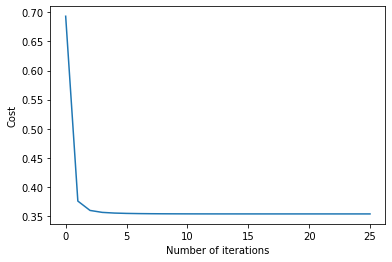

For alpha: 7.95 Iterations: 10000
Predicted y: [[1 0 0 ... 0 1 0]] Accuracy: 0.9218129139072848




In [126]:
alpha = [7.95]
n_iters = 10000
beta_ls3 = [0] * len(alpha)
ypred_ls3 = [0] * len(alpha)
accuracy_ls3 = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls3[i] = logistic_gradientDescent3(X3_train, y3_train, a, n_iters)
    ypred_ls3[i] = logistic_predict3(X3_test,beta_ls3[i])
    accuracy_ls3[i] = logistic_accuracy3(y3_test,ypred_ls3[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls3[i].T,'Accuracy:',accuracy_ls3[i])
    print('\n')
   

### Experiment 4 For Linear Regression

In [ ]:
#plotting correlation matrix
import seaborn as sns
corr=product_1.corr()
plt.figure(figsize = (18,18))
sns.heatmap(corr,cbar= True, annot=True, square = True)
plt.show()

In [ ]:
#experiment 4
product_1

In [ ]:
parameters =['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'VWM', 'SA','VWN']
target=["Average"]
x4_parameter=product_1[parameters]
y4_parameter=product_1[target]
#x_parameter.insert(0,'Intercept',1)
x_parameter.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x4_scaled = scaler.fit_transform(x4_parameter)

In [ ]:
x4_parameter = pd.DataFrame(x4_scaled,columns=parameters)

In [ ]:
x4_parameter.insert(0,'Intercept',1)

In [ ]:

#Splitting the data randomly into test and train data set
x4_train, x4_test, y4_train, y4_test = train_test_split(x4_parameter, y4_parameter, test_size=0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler() 
  
# To scale the data 
x4_train = x4_train.as_matrix()
x4_test = x4_test.as_matrix()
y4_train = y4_train.as_matrix()
y4_test = y4_test.as_matrix()

In [ ]:
def costFunction4(Datax, Datay, coeffMatrix):
    dataLength = len(Datax);
    costValue = np.sum(((Datax.dot(coeffMatrix.T)) - Datay) ** 2) / (2 * dataLength);
    return costValue;

In [ ]:
def lin_gradient4(datax, datay, alpha, iterations):
    coeffMatrix = np.zeros((1, len(datax[0])));
    length = len(datay);
    hist_cost = [0] * iterations;
    for i in range(iterations):
        costValue = costFunction4(datax, datay, coeffMatrix);
        hist_cost[i] = costValue; 
        difference = datax.dot(coeffMatrix.T) - datay;
        gradient_descent = datax.T.dot(difference) / length;
        coeffMatrix = coeffMatrix - (alpha * gradient_descent.T);    
#threshold = 0.0000001
        if (abs(hist_cost[i]- hist_cost[i-1])) <=0.1:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', hist_cost[0])
                print('Cost at convergance: ', hist_cost[i-1])
                break
    hist_cost = np.trim_zeros(hist_cost)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(hist_cost) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix

In [ ]:
#predict
def predict_lin4(x4_test, coeffMatrix):
    pred_target = x4_test.dot(coeffMatrix.T);
    return pred_target;

In [ ]:
def lin_rmse4(y4_test, pred_target):
    m_rmse = (sum((y4_test - pred_target) ** 2) / len(y4_test))
    m_rmse = ((m_rmse)**(1/2))
    return m_rmse;

In [ ]:
# linear regression on random feature selection 
learning_rate = [0.0009]
coef_hist_lin4 = [0] * len(learning_rate)
pred_y_lin4 = [0] * len(learning_rate)
rmse_lin4 = [0] * len(learning_rate)
for i, lr in enumerate(learning_rate, start=0):
    coef_hist_lin4[i] = lin_gradient4(x4_train, y4_train, lr, 10000)
    pred_y_lin4[i] = predict_lin4(x4_test, coef_hist_lin3[i])
    print("predicted dataset", pred_y_lin4[i])
    rmse_lin4[i] = lin_rmse4(y4_test, pred_y_lin3[i])
    print("RMSE for alpha=", lr, "  is: ", rmse_lin3[i])
    print ('\n')

In [ ]:
#Best 8 features for logistic regression

In [127]:
X4 = product[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'VWM', 'SA','VWN']]

In [128]:
y4 = product[['Average']]

In [129]:
X4 = scaler.fit_transform(X4)

In [133]:
X4 = pd.DataFrame(X4,columns=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'VWM', 'SA','VWN'])

In [134]:
X4.insert(0,'Intercept',1)

In [135]:
y4.loc[product_1['log_Average'] >= 4.62,'Average'] = 1
y4.loc[product_1['log_Average'] < 4.62,'Average'] = 0

In [136]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=0)

In [137]:
X4_train = X4_train.as_matrix()
y4_train = y4_train.as_matrix()
X4_test = X4_test.as_matrix()
y4_test = y4_test.as_matrix()

In [138]:
def sigmoid4(Datax,coeffmatrix):
    z=np.dot(Datax,coeffmatrix.T)
    z=1/(1+np.exp(-z))
    return z 

In [139]:
#define logistic cost function
def logisticcostvalue4(sigmoid_df_y,Datay,datalength):
    datalength = len(Datay)
    total_cost = -(np.sum((Datay.T).dot(np.log(sigmoid_df_y))) + np.sum((1-Datay.T).dot(np.log(1-sigmoid_df_y))))/datalength
    return total_cost

In [140]:
#define gradient function
def logistic_gradientDescent4(Datax, Datay, alpha, iterations):
    
    print("learning rate: ", alpha)
    print("Iteration limit: ", iterations)
    coeffMatrix = np.zeros((1, len(Datax[0])));
    #list for saving the cost from each iterations
    costHistory = [0] * iterations
    dataLength = len(Datax)
    
    #gradient descent
    for i in range(iterations):
        sigmoid_y = sigmoid4(Datax,coeffMatrix)
        loss =  sigmoid_y - Datay
        gradient = Datax.T.dot(loss) / dataLength
        coeffMatrix = coeffMatrix - (alpha * gradient.T)
        costValue = logisticcostvalue4(sigmoid_y, Datay, dataLength)
        costHistory[i] = costValue 
        if (abs(costHistory[i]- costHistory[i-1])) <=0.0000001:
                print("Convergence threshold level reached")
                print("Iterations needed to converge: ", i-1)
                print('Initial cost: ', costHistory[0])
                print('Cost at convergance: ', costHistory[i-1])
                break
        if i == (iterations-1):
            print("Iteration limit reached ",iterations)
            print('Initial cost: ', costHistory[0])
            print('Cost at convergance: ', costHistory[i-1])
    
    costHistory = np.trim_zeros(costHistory)
    print('Model Coefficients: ', coeffMatrix)
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix

In [141]:
def logistic_predict4(x2_test, coeffMatrix):
    predictedTarget = x2_test.dot(coeffMatrix.T);
    predictedTarget= np.where(predictedTarget >= 0.5 , 1, 0)
    return predictedTarget

In [142]:
#how to print accuracy
def logistic_accuracy4(ypredict,ytest):
  df = pd.DataFrame({'actual': ytest.flatten(), 'predicted': ypredict.flatten()})
  correct= df.loc[df['actual'] == df['predicted']]
  rate=len(correct)/len(ytest)   
  return rate

learning rate:  7.95
Iteration limit:  10000
Convergence threshold level reached
Iterations needed to converge:  27
Initial cost:  0.6931471805599302
Cost at convergance:  0.34832213626441216
Model Coefficients:  [[-0.75873441  1.99048826  1.58145905  0.10374746 -1.48428661 -1.33089964
  -0.06940835 -0.30873157 -0.02870542]]


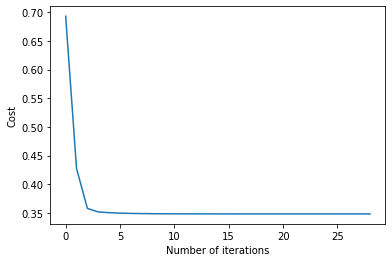

For alpha: 7.95 Iterations: 10000
Predicted y: [[1 0 0 ... 0 1 0]] Accuracy: 0.8997102649006623




In [144]:
alpha = [7.95]
n_iters = 10000
beta_ls4 = [0] * len(alpha)
ypred_ls4 = [0] * len(alpha)
accuracy_ls4 = [0] * len(alpha)
for i,a in enumerate(alpha,start=0):
    beta_ls4[i] = logistic_gradientDescent4(X4_train, y4_train, a, n_iters)
    ypred_ls4[i] = logistic_predict4(X4_test,beta_ls4[i])
    accuracy_ls4[i] = logistic_accuracy4(y4_test,ypred_ls4[i])
    print('For alpha:',a,'Iterations:',n_iters)
    print('Predicted y:',ypred_ls4[i].T,'Accuracy:',accuracy_ls4[i])
    print('\n')